<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/Neural_Networks/Conv_NN/_04_Cats_vs_Dogs_CNN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Artificial Intelligence/Kaggle"

In [ ]:
pwd

'/content'

In [ ]:
%cd '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsDogs'

/content/drive/My Drive/Artificial Intelligence/DataSet/CatsDogs


In [ ]:
pwd

'/content/drive/My Drive/Artificial Intelligence/DataSet/CatsDogs'

# Downloading the dataset

In [ ]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 12.1MB/s]
100% 543M/543M [00:06<00:00, 97.5MB/s]
100% 543M/543M [00:06<00:00, 83.7MB/s]
 96% 259M/271M [00:03<00:00, 76.7MB/s]
100% 271M/271M [00:03<00:00, 73.3MB/s]


In [ ]:
!ls

sampleSubmission.csv  test1.zip  train	train.zip  val


# Create a folder structure

![Screenshot 2020-07-09 at 12 51 35](https://user-images.githubusercontent.com/26361028/87009556-eeb79600-c1e2-11ea-9494-a530cfcba289.png)


In [ ]:
# create root directory
root_dir = 'root'
!mkdir -p {root_dir}

# define training directory
train_dir = f'{root_dir}/train'
train_dog_dir = f'{train_dir}/dog'
train_cat_dir = f'{train_dir}/cat'

# define validation directory
val_dir = f'{root_dir}/val'
val_dog_dir = f'{val_dir}/dog'
val_cat_dir = f'{val_dir}/cat'

# create training directory
! mkdir -p {train_dog_dir}
! mkdir -p {train_cat_dir}

# create validation directory
! mkdir -p {val_dog_dir}
! mkdir -p {val_cat_dir}

# # create training directory
# ! mkdir -p {'train/dog'}
# ! mkdir -p {'train/cat'}

# # create validation directory
# ! mkdir -p {'val/dog'}
# ! mkdir -p {'val/cat'}

In [ ]:
!ls

root  sampleSubmission.csv  test1.zip  train  train.zip


## Unzip train dataset

In [ ]:
data_dir = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsDogs'

In [ ]:
# unzip training dataset in root dir
! unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      

In [ ]:
import os
path = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsDogs/train'
files = os.listdir(path)
len(files)

0

## Organize data

In [ ]:
import os
import re
import shutil

In [ ]:
# Move training images for a good folder structure

train_dir = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsDogs/train'
train_dog_dir = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsDogs/root/train/dog'
train_cat_dir = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsDogs/root/train/cat'

val_dog_dir = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsDogs/root/val/dog'
val_cat_dir = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsDogs/root/val/cat'

In [ ]:
files = os.listdir(train_dir)
for filename in files:
  dog_search = re.search('dog', filename)
  cat_search = re.search('cat', filename)
  if dog_search:
    shutil.move(f'{train_dir}/{filename}',train_dog_dir)
  elif cat_search:
    shutil.move(f'{train_dir}/{filename}',train_cat_dir)

In [ ]:
# count number of files in dog and cat folders 
print (len(os.listdir(train_dog_dir)))
print (len(os.listdir(train_cat_dir)))

11500
11500


In [ ]:
# Take some dog images from training dataset to build a validation dog dataset
files = os.listdir(train_dog_dir)
for filename in files:
  dog_search = re.search("5\d\d\d",filename)
  if dog_search:
    shutil.move(f'{train_dog_dir}/{filename}',val_dog_dir)
  
# Take some cat images from training dataset to build a validation cat dataset
files = os.listdir(train_cat_dir)
for filename in files:
  cat_search = re.search("5\d\d\d",filename)
  if cat_search:
    shutil.move(f'{train_cat_dir}/{filename}',val_cat_dir)

In [ ]:
val_dog_dir_files = os.listdir(val_dog_dir)
val_cat_dir_files = os.listdir(val_cat_dir)

print (len(val_dog_dir_files))
print (len(val_cat_dir_files))

1000
1000


In [ ]:
print (os.listdir(train_dog_dir))
print (os.listdir(train_cat_dir))
print (os.listdir(val_dog_dir))
print (os.listdir(val_cat_dir))

['dog.9585.jpg', 'dog.9586.jpg', 'dog.9587.jpg', 'dog.9588.jpg', 'dog.9589.jpg', 'dog.959.jpg', 'dog.9590.jpg', 'dog.9591.jpg', 'dog.9592.jpg', 'dog.9593.jpg', 'dog.9594.jpg', 'dog.9595.jpg', 'dog.9596.jpg', 'dog.9597.jpg', 'dog.9598.jpg', 'dog.9599.jpg', 'dog.96.jpg', 'dog.960.jpg', 'dog.9600.jpg', 'dog.9601.jpg', 'dog.9602.jpg', 'dog.9603.jpg', 'dog.9604.jpg', 'dog.9605.jpg', 'dog.9606.jpg', 'dog.9607.jpg', 'dog.9608.jpg', 'dog.9609.jpg', 'dog.961.jpg', 'dog.9610.jpg', 'dog.9611.jpg', 'dog.9612.jpg', 'dog.9613.jpg', 'dog.9614.jpg', 'dog.9615.jpg', 'dog.9616.jpg', 'dog.9617.jpg', 'dog.9618.jpg', 'dog.9619.jpg', 'dog.962.jpg', 'dog.9620.jpg', 'dog.9621.jpg', 'dog.9622.jpg', 'dog.9623.jpg', 'dog.9624.jpg', 'dog.9625.jpg', 'dog.9626.jpg', 'dog.9627.jpg', 'dog.9628.jpg', 'dog.9629.jpg', 'dog.963.jpg', 'dog.9630.jpg', 'dog.9631.jpg', 'dog.9632.jpg', 'dog.9633.jpg', 'dog.9634.jpg', 'dog.9635.jpg', 'dog.9636.jpg', 'dog.9637.jpg', 'dog.9638.jpg', 'dog.9639.jpg', 'dog.964.jpg', 'dog.9640.jpg',

# Finally we are ready to transform the data

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms,models

In [ ]:
data_dir = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsDogs/root'

# Use cuda if it is available
train_on_gpu = torch.cuda.is_available()

# define transforms for the training data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

# define transforms for the validation data
val_transforms = transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])


# pass transforms in here 
train_data = datasets.ImageFolder(data_dir + '/train',transform=train_transforms)
val_data = datasets.ImageFolder(data_dir + '/val',transform=val_transforms)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64,shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data,batch_size=64)

## Visualize a batch of training data

In [ ]:
classes = ['cat','dog']

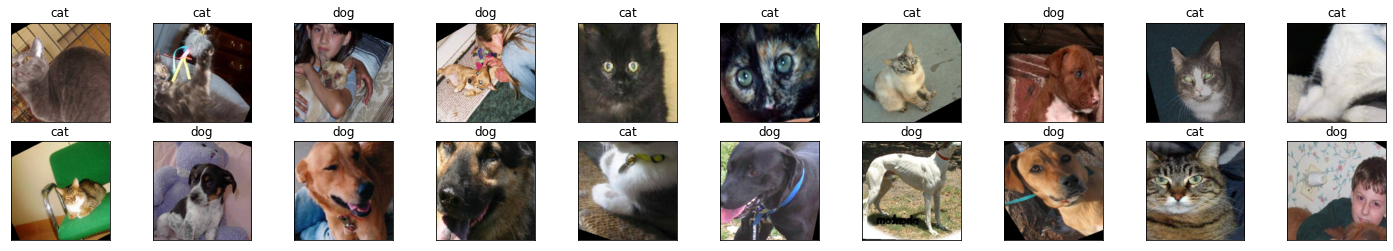

In [ ]:
import numpy as np
# helper function to un-normalize and display an image
def imshow(img):
  img = img.numpy().transpose((1, 2, 0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  img = std * img + mean
  img = np.clip(img, 0, 1)
  plt.imshow(img)   # convert from tensor image

dataiter = iter(train_loader)
images,labels = dataiter.next()

# plot the images in batch along with the corresponding labels
fig = plt.figure(figsize=(25,4))
# display 20 images
for idx in np.arange(20):
  ax = fig.add_subplot(2,20/2,idx+1,xticks=[],yticks=[])
  imshow(images[idx])
  ax.set_title(classes[labels[idx]])

In [ ]:
images.shape

torch.Size([64, 3, 224, 224])

In [ ]:
# here we see our image size is 224x224

# Define the Network architecture

In [ ]:
# define CNN architecture
class Net(nn.Module):
  def __init__(self, in_channels, num_classes, hidden):
    super(Net,self).__init__()
    # convolutional layer (sees 224x224x3 image tensor)
    self.conv1 = nn.Conv2d(in_channels=in_channels,out_channels=16,kernel_size=(3,3),stride=(1,1),padding=(1,1))
    # convolutional layer (sees 112x112x16 image tensor)
    self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=(3,3),stride=(1,1),padding=(1,1))
    # convolutional layer (sees 56x56x32 image tensor)
    self.conv3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=(3,3),stride=(1,1),padding=(1,1))
    # max pooling layer
    self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
    # linear layer (64x28x28)
    self.fc1 = nn.Linear(64*28*28,hidden[0])
    # linear layer (512,256)
    self.fc2 = nn.Linear(hidden[0],hidden[1])
    # linear layer (256,2)
    self.fc3 = nn.Linear(hidden[1],2)
    # dropout layer
    self.dropout = nn.Dropout(0.2)

  def forward(self,x):
    # add sequence of convolutional and max pooling layer
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    # flatten image input
    x = x.view(x.shape[0], -1)
    # add dropout layer
    x = self.dropout(x)
    # add 1st hidden layer
    x = F.relu(self.fc1(x))
    # add dropout layer, with relu
    x = self.dropout(x)
    # add second hidden layer, with relu
    x = F.relu(self.fc2(x))
    # add dropout layer
    x = self.dropout(x)
    # add 3rd hidden layer, without relu
    x = self.fc3(x)
    return x

In [ ]:
in_channels = 3
num_classes = 2
hidden = [512, 256]

# create a complete CNN model
model = Net(in_channels=in_channels, num_classes=num_classes, hidden=hidden)
print (model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [ ]:
# move tensors to gpu if cuda is available
if train_on_gpu:
  model.cuda()

In [ ]:
train_on_gpu

True

# Specify loss function and optimizer

In [ ]:
import torch.optim as optim

# specify loss
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
print (len(train_loader.sampler))
print (len(train_loader))
print (len(val_loader.sampler))
print (len(val_loader))

23000
360
2000
32


# Train the Network

In [ ]:
import datetime

In [ ]:
path = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsAndDogs/checkpoint'

def save_ckp(state, is_best):
  if is_best:
    torch.save(state, path+'/best_model_cats_dogs.pt')
  else:
    torch.save(state, path+'/model_cats_dogs.pt')

In [ ]:
def load_ckp(ckp_path, model, optimizer):
  checkpoint = torch.load(ckp_path)
  model.load_state_dict(checkpoint['state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer'])
  return model, optimizer, checkpoint['epoch']

In [ ]:
model_path = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsAndDogs/checkpoint/model_cats_dogs.pt'
load = False
start_epoch = 1
if load:
  model, optimizer, start_epoch = load_ckp(model_path, model, optimizer)

In [ ]:
from tqdm import tqdm

In [ ]:
epochs = 1
valid_loss_min = np.inf
for epoch in range(start_epoch,epochs+1):
  # keep track of training and validation loss
  train_loss = 0.0
  valid_loss = 0.0
  batch = 0
  num_batches = len(train_loader)
  # train the model
  model.train()   # prep for training
  print ('Training...')
  for data,target in train_loader:
    batch += 1
    print (f'Epoch: {epoch} \t Batch: {batch}/{num_batches} \t Time: {datetime.datetime.now()}')
    # move tensors to gpu if cuda available
    if train_on_gpu:
      data,target = data.cuda(),target.cuda()
    # clear the gradients of all optimized variables
    optimizer.zero_grad()
    # forward pass:
    output = model(data)
    # calculate loss
    loss = criterion(output,target)
    # backward pass
    loss.backward()
    # update parameters
    optimizer.step()
    # update training loss
    train_loss += loss.item()

    if batch % 5 == 0:
      break

  # validate the model
  num_batches = len(val_loader)
  batch = 0
  model.eval()
  print ('Validating...')
  for data,target in tqdm(val_loader):
    batch += 1
    print (f'Batch: {batch}/{num_batches}')
    # move tensors to gpu if cuda available
    if train_on_gpu:
      data,target = data.cuda(),target.cuda()
    # forward pass
    output = model(data)
    # calculate loss
    loss = criterion(output,target)
    # update validation loss
    valid_loss += loss.item()

  checkpoint = {
      'epoch' : epoch+1,
      'state_dict' : model.state_dict(),
      'optimizer' : optimizer.state_dict()
  }

  save_ckp(checkpoint, False)

  # calculate the average losses
  train_loss = train_loss/len(train_loader.sampler)
  valid_loss = valid_loss/len(val_loader.sampler)

  # print train loss/ valid loss
  print ('Epoch {}/{} \t Training Loss: {:.6f} \t Validation Loss: {:.6f}'.format(epoch,epochs,train_loss,valid_loss))

  # save model if validation has decreased 
  if valid_loss <= valid_loss_min:
    print ('Validation loss decreased ({:.6f} -> {:.6f}). Saving model...'.format(valid_loss_min,valid_loss))
    save_ckp(checkpoint, True)
    torch.save(model.state_dict(),'model_cats_dogs.pt')
    valid_loss_min = valid_loss

Training...
Epoch: 1 	 Batch: 1/360 	 Time: 2020-08-01 07:29:28.773441
Epoch: 1 	 Batch: 2/360 	 Time: 2020-08-01 07:30:05.769598
Epoch: 1 	 Batch: 3/360 	 Time: 2020-08-01 07:30:41.062976
Epoch: 1 	 Batch: 4/360 	 Time: 2020-08-01 07:31:14.988795


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 1 	 Batch: 5/360 	 Time: 2020-08-01 07:31:53.186186
Validating...


  3%|▎         | 1/32 [00:00<00:12,  2.40it/s]

Batch: 1/32


  6%|▋         | 2/32 [00:00<00:12,  2.40it/s]

Batch: 2/32


  9%|▉         | 3/32 [00:01<00:12,  2.42it/s]

Batch: 3/32


 12%|█▎        | 4/32 [00:01<00:11,  2.42it/s]

Batch: 4/32


 16%|█▌        | 5/32 [00:02<00:11,  2.39it/s]

Batch: 5/32


 19%|█▉        | 6/32 [00:02<00:10,  2.38it/s]

Batch: 6/32


 22%|██▏       | 7/32 [00:02<00:10,  2.38it/s]

Batch: 7/32


 25%|██▌       | 8/32 [00:03<00:10,  2.39it/s]

Batch: 8/32


 28%|██▊       | 9/32 [00:03<00:09,  2.43it/s]

Batch: 9/32


 31%|███▏      | 10/32 [00:04<00:09,  2.39it/s]

Batch: 10/32


 34%|███▍      | 11/32 [00:04<00:08,  2.43it/s]

Batch: 11/32


 38%|███▊      | 12/32 [00:04<00:08,  2.46it/s]

Batch: 12/32


 41%|████      | 13/32 [00:05<00:07,  2.46it/s]

Batch: 13/32


 44%|████▍     | 14/32 [00:05<00:07,  2.50it/s]

Batch: 14/32


 47%|████▋     | 15/32 [00:06<00:06,  2.48it/s]

Batch: 15/32


 50%|█████     | 16/32 [00:06<00:06,  2.47it/s]

Batch: 16/32


 53%|█████▎    | 17/32 [00:06<00:06,  2.44it/s]

Batch: 17/32


 56%|█████▋    | 18/32 [00:07<00:05,  2.40it/s]

Batch: 18/32


 59%|█████▉    | 19/32 [00:07<00:05,  2.42it/s]

Batch: 19/32


 62%|██████▎   | 20/32 [00:08<00:04,  2.41it/s]

Batch: 20/32


 66%|██████▌   | 21/32 [00:08<00:04,  2.40it/s]

Batch: 21/32


 69%|██████▉   | 22/32 [00:09<00:04,  2.46it/s]

Batch: 22/32


 72%|███████▏  | 23/32 [00:09<00:03,  2.44it/s]

Batch: 23/32


 75%|███████▌  | 24/32 [00:09<00:03,  2.45it/s]

Batch: 24/32


 78%|███████▊  | 25/32 [00:10<00:02,  2.42it/s]

Batch: 25/32


 81%|████████▏ | 26/32 [00:10<00:02,  2.46it/s]

Batch: 26/32


 84%|████████▍ | 27/32 [00:11<00:02,  2.46it/s]

Batch: 27/32


 88%|████████▊ | 28/32 [00:11<00:01,  2.45it/s]

Batch: 28/32


 91%|█████████ | 29/32 [00:11<00:01,  2.48it/s]

Batch: 29/32


 94%|█████████▍| 30/32 [00:12<00:00,  2.47it/s]

Batch: 30/32


100%|██████████| 32/32 [00:12<00:00,  2.50it/s]

Batch: 31/32
Batch: 32/32


Epoch 1/1 	 Training Loss: 0.000151 	 Validation Loss: 0.011085
Validation loss decreased (inf -> 0.011085). Saving model...


In [ ]:
best_ckp_path = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsAndDogs/checkpoint/best_model_cats_dogs.pt'
checkpoint = torch.load(best_ckp_path)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:
!ls

model_cats_dogs.pt  root  sampleSubmission.csv	test1.zip  train  train.zip


In [ ]:
# unzip test dataset
! unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: test1/5520.jpg          

In [ ]:
test_path = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsAndDogs/test1/test1'
test_files = os.listdir(test_path)
print (len(test_files))

12500


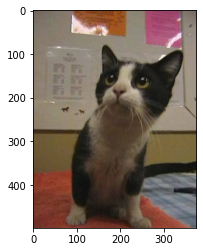

In [ ]:
from PIL import Image
test_data_dir = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsAndDogs/test1/test1'
test_data_files = os.listdir(test_data_dir)
img = Image.open(f'{test_data_dir}/{test_data_files[100]}')
plt.imshow(img)

In [ ]:
def apply_test_transforms(inp):
    out = transforms.functional.resize(inp, [224,224])
    out = transforms.functional.to_tensor(out)
    out = transforms.functional.normalize(out, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    return out

In [ ]:
im_as_tensor = apply_test_transforms(img)
print(im_as_tensor.size())
minibatch = torch.stack([im_as_tensor])
print(minibatch.size())

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


In [ ]:
model.cuda()
model(minibatch.cuda())

tensor([[0.0205, 0.0322]], device='cuda:0', grad_fn=<AddmmBackward>)

In [ ]:
softmax = nn.Softmax(dim=1)
preds = softmax(model(minibatch.cuda()))
preds

tensor([[0.4971, 0.5029]], device='cuda:0', grad_fn=<SoftmaxBackward>)

In [ ]:
preds[0,1].item()

0.5029400587081909

In [ ]:
import re
def extract_file_id(fname):
    print("Extracting id from " + fname)
    return int(re.search('\d+', fname).group())

print (test_data_files[100])
print (extract_file_id(f'{test_data_files[100]}'))

12142.jpg
Extracting id from 12142.jpg
12142
